# Author: Kumar R.

# Assignment-Linear Regression

### Problem Statement: Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [1]:
#Here is the code to load the data:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.datasets import load_boston
boston = load_boston()
data = pd.DataFrame(boston.data)

In [2]:
#Decribing the datset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
#Column names from the dataset
column_names=boston.feature_names

In [5]:
data.columns = column_names

In [6]:
#target column of the dataset
data['Price']=boston.target

In [7]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
#Check the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


All the columns are numeric as datatype. We can also observe that none of hte colums have missing values.

## EDA (Exploratory Data Analysis)

C:\Users\Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


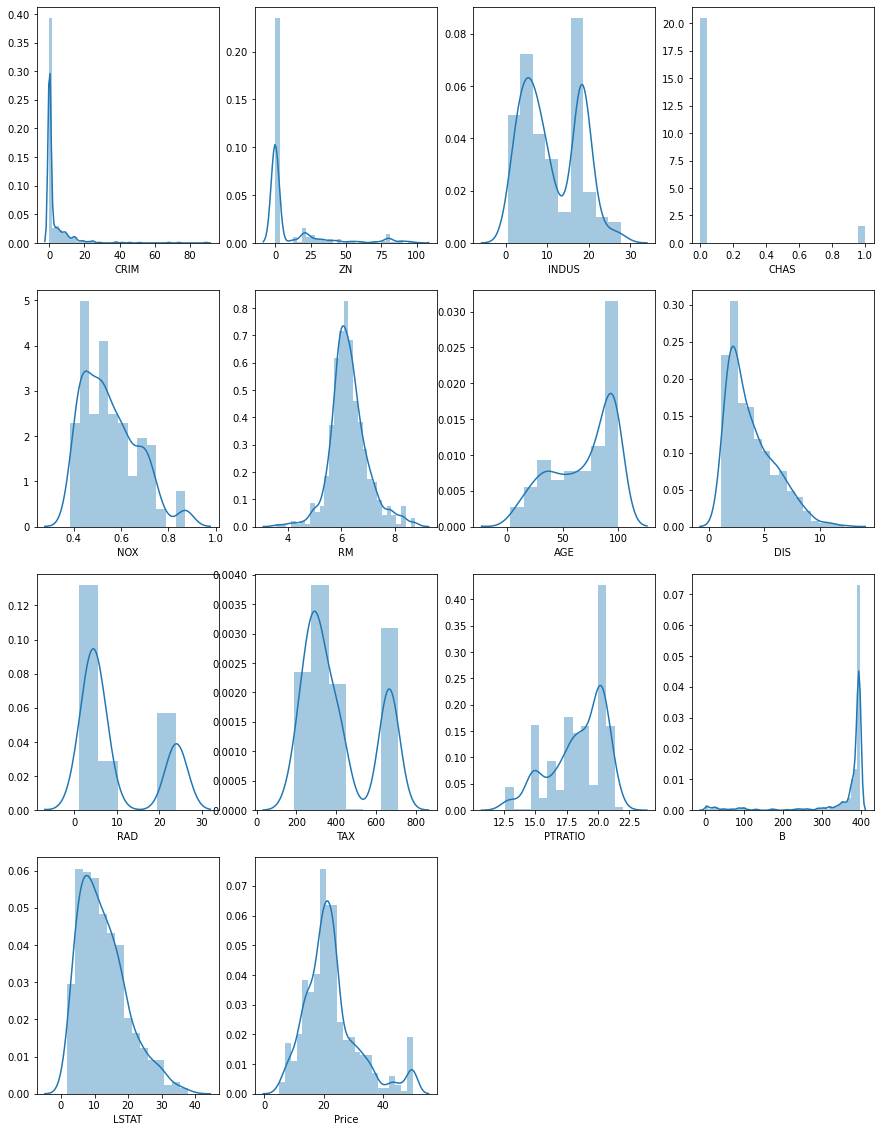

In [10]:
#let's see how the data is distributed in every column
plt.figure(figsize=(15,20), facecolor='white')
plotnumber = 1
for column in data:
    if plotnumber<=14:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column], label=[column])
        plotnumber+=1
plt.show()

import warnings
warnings.filterwarnings('ignore')
#warnings.warn( UserWarning)

We can see there is some skewness in the data. let's deal with data.

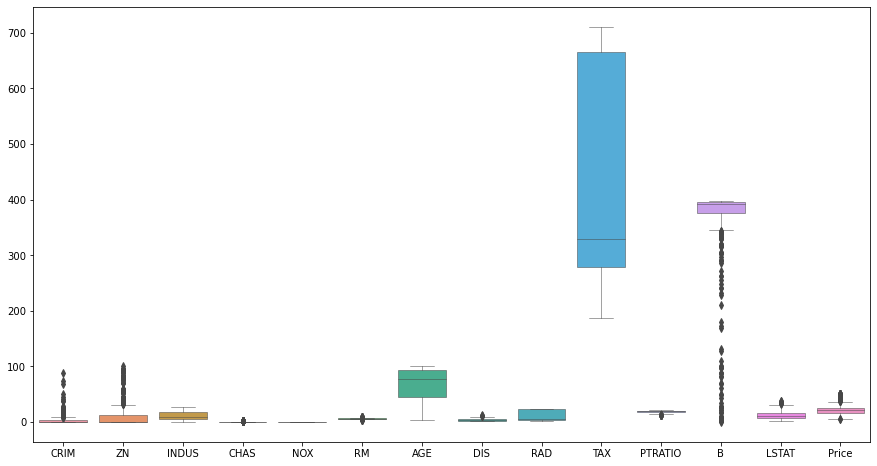

In [9]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=data, ax=ax, linewidth=0.5)

There are outliers in few of the columns.

In [10]:
#Removing the outliers from the columns
def outlier(column):
    #column = data.columns
    sorted(column)
    
    Q1 ,Q3 = np.percentile(column, [25,75])
    
    IQR = Q3-Q1
    
    LQ = Q1-(IQR*1.5)
    
    UQ = Q3+(IQR*1.5)
    
    return LQ, UQ

In [11]:
for col in data.columns:
    lr, ur = outlier(data[col])
    data.drop(data[(data[col] > ur) | (data[col] < lr)].index , inplace=True )

C:\Users\Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


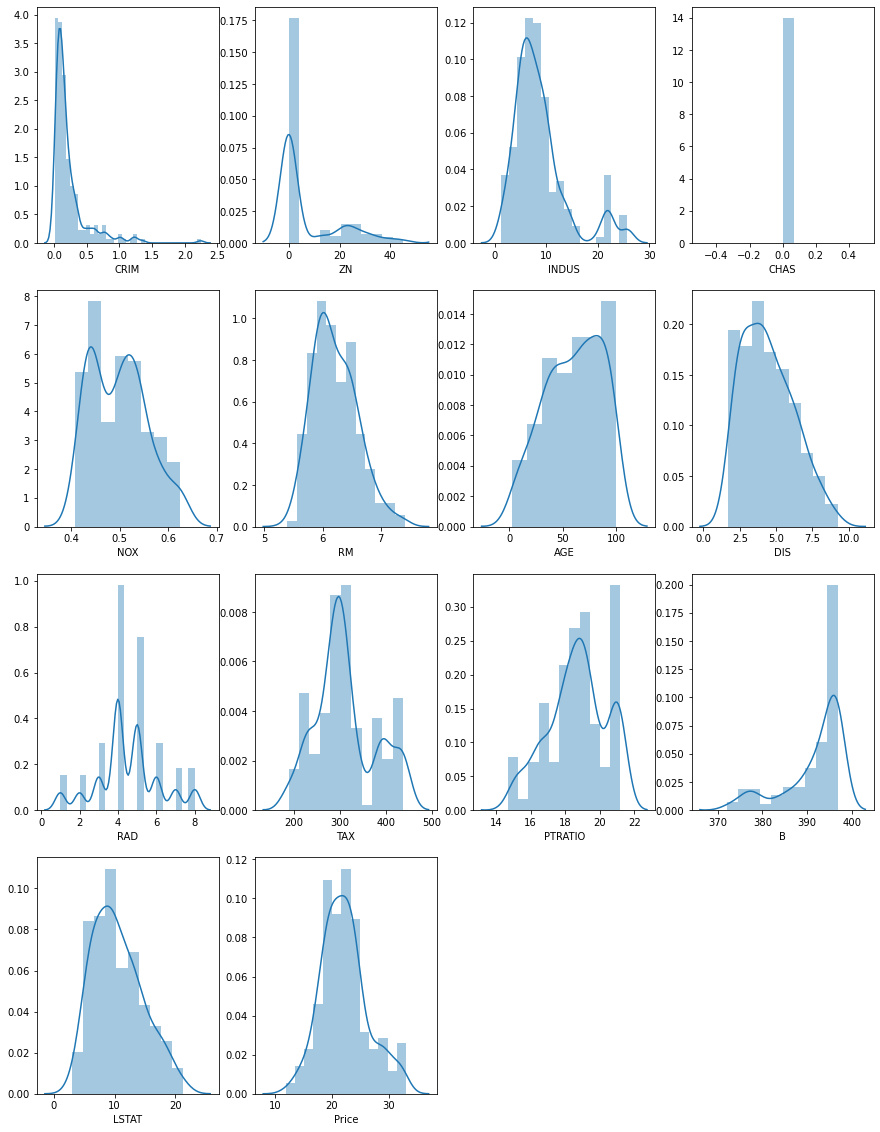

In [12]:
plt.figure(figsize=(15,20), facecolor='white')
plotnumber = 1
for column in data:
    if plotnumber<=14:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column], label=[column])
        plotnumber+=1
plt.show()

The data looks quite good now compared to before.

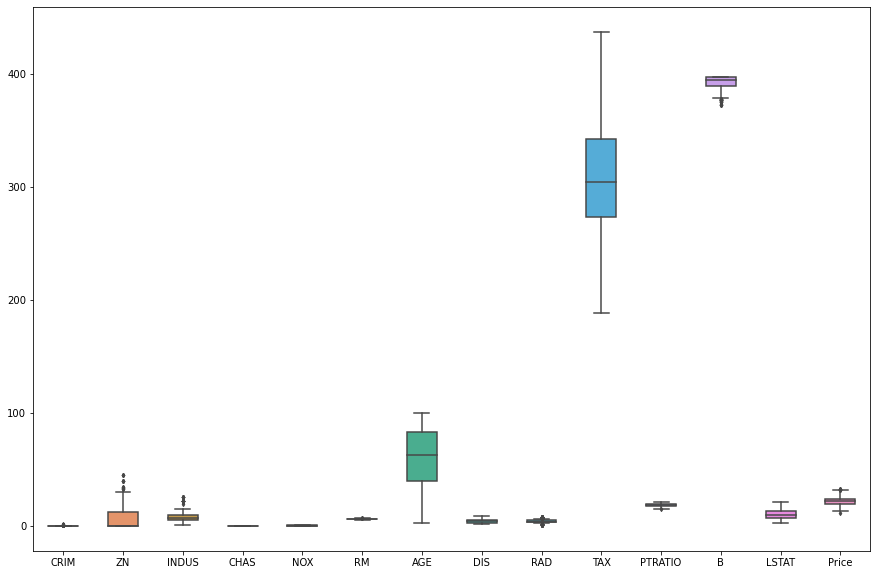

In [13]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [14]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1


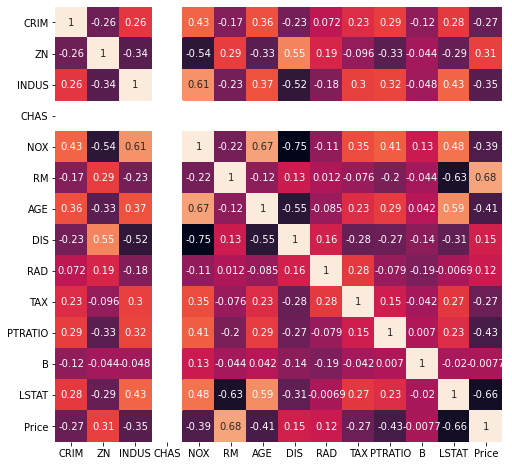

In [15]:
#Check the correlationn and multicollinearity of the features with respect to label
ax = plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),cmap=None,cbar=False, annot=True)

Since the column **CHAS, DIS, RAD and B** has very less correlation with the Price, we can drop this feature to train the model.

In [16]:
#Delete the columns which have less correlation with respect to the label
data = data.drop(['CHAS','DIS','RAD','B'], axis=1)

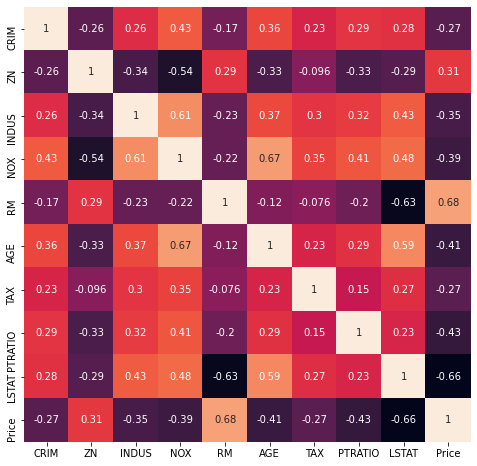

In [25]:
ax = plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),cmap=None,cbar=False, annot=True)

In [17]:
data.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT,Price
0,0.00632,18.0,2.31,0.538,6.575,65.2,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,242.0,17.8,9.14,21.6
5,0.02985,0.0,2.18,0.458,6.430,58.7,222.0,18.7,5.21,28.7
6,0.08829,12.5,7.87,0.524,6.012,66.6,311.0,15.2,12.43,22.9
7,0.14455,12.5,7.87,0.524,6.172,96.1,311.0,15.2,19.15,27.1


In [18]:
#Splitting the features and label
feature = data.iloc[:,:-1].values
label = data.iloc[:,[-1]].values

In [79]:
print(feature.shape)
print("Dimensions:",feature.ndim)

(214, 9)
Dimensions: 2


In [80]:
print(label.shape)
print("Dimensions:",label.ndim)

(214, 1)
Dimensions: 2


In [21]:
#Standardize the data(features)
from sklearn.preprocessing import StandardScaler
sc_feature = StandardScaler()
feature = sc_feature.fit_transform(feature)

In [28]:
#Slit the data inot train test 
from sklearn.model_selection import train_test_split
for i in range(151,300):
    
    x_train, x_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=i)
    #create a model
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(x_train,y_train)

    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)

    if test_score>train_score and test_score>0.8:
        print(f"test score {test_score}, train score {train_score}, for RS {i}")

test score 0.8148574086156553, train score 0.6068326716077754, for RS 180


The model is giving 81% test score however the train score is just 60%. Since it is a overfitting model, now I am going to train a model without removing the outliers.

## Withput removing the outliers

In [30]:
#Load the dataset
from sklearn.datasets import load_boston
boston = load_boston()
data2 = pd.DataFrame(boston.data)

In [31]:
data2.columns = boston.feature_names

In [33]:
data2['PRICE'] = boston.target

In [34]:
data2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [35]:
#Seperate feature and label
feature2 = data2.iloc[:,:-1].values
label2  = data2.iloc[:,[-1]].values

In [36]:
#Standard scaler
from sklearn.preprocessing import StandardScaler
sc_feat = StandardScaler()

feature2 = sc_feat.fit_transform(feature2)

In [44]:
#Model training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature2, label2, test_size=0.2, random_state=355)
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(x_train,y_train)

train_score = model2.score(x_train,y_train)
test_score = model2.score(x_test,y_test)

if test_score>train_score and test_score>0.8:
    print(f"test score {test_score}, train score {train_score}")

test score 0.8402660786229565, train score 0.721023065623692


Here we can see that the model is giving 848 as testining accurace and 72% as training accuracy which is better than the above model. Therefore, I am going to deploy model2 as a final model.

In [45]:
print(model2.intercept_)

[22.65039227]


In [55]:
c = print(model2.coef_)

[[-0.94349768  1.22595144  0.16991886  0.72060491 -2.32939262  2.55580793
   0.1260409  -3.47670763  2.79570698 -2.10690325 -2.02975799  0.86352612
  -3.91700592]]


In [73]:
prediction = model2.predict(x_test)

In [75]:
from sklearn import metrics
print(f"Mean_absolute_error: {metrics.mean_absolute_error(y_test, prediction)}")
print(f"Mean_Square_error: {metrics.mean_squared_error(y_test, prediction)}")

Mean_absolute_error: 2.419334139707542
Mean_Square_error: 10.354889938462037


In [78]:
#Deployment of the model and Standard scalar using pickle.
import pickle
pickle.dump(model2, open('Price_prediction.model','wb'))
pickle.dump(sc_feat, open("Standard_scalar.model", 'wb'))